In [175]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [168]:
# Load data.
df_3d = pd.read_pickle('../output/df_3d_zero.pkl.gz', compression='gzip')

In [169]:
# Drop columns for Canonical SMILES and Target to keep only the features.
X = df_3d.drop(labels=['Canonical SMILES', 'Target'], axis = 1)
X.shape

(2393, 1495)

# Principle Component Analysis (PCA)

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

In [170]:
# Data scaling before carrying out PCA.
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X)

In [171]:
# Create PCA object with the number of principle components to calculate.
pca = PCA(n_components = 2)

# Fit the model with the dataset and apply the dimensionality reduction on the dataset.
pca_3d = pca.fit_transform(X_transform)
type(pca_3d)

numpy.ndarray

In [172]:
# Print explained variance ratio i.e. how much variance is captured 
# in each principle component.
print("Explained variance ration per principle component: ",pca.explained_variance_ratio_)

Explained variance ration per principle component:  [0.21405919 0.13438082]


In [173]:
df_pca_3d = pd.DataFrame(data = pca_3d, index = df_3d.index, columns = ["PC1", "PC2"])

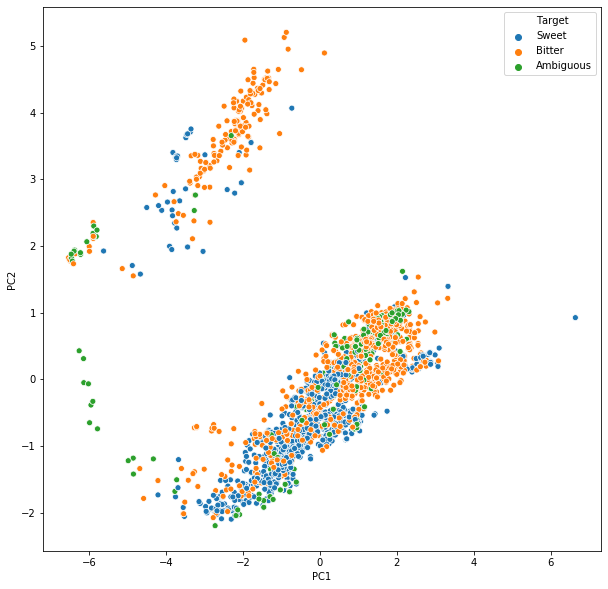

In [174]:
# Plot a scatter plot with PC1 on the x-axis and PC2 on the y-axis.
# Colour the data points with different features.
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="PC1", y="PC2", data=df_pca_3d, hue = df_3d["Target"])

# t-SNE

In [178]:
tsne = TSNE(n_components=2, n_iter=300)
tsne_3d = tsne.fit_transform(X_transform)


In [179]:
df_tsne_3d = pd.DataFrame(data = tsne_3d, index = df_3d.index, columns = ["tSNE1", "tSNE2"])

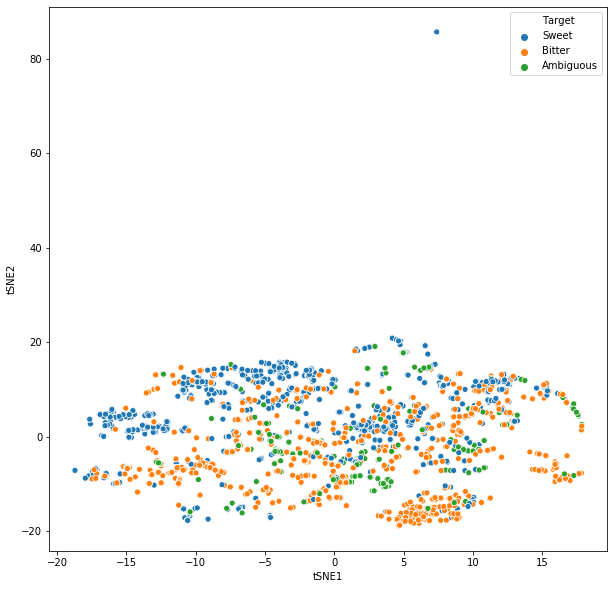

In [180]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="tSNE1", y="tSNE2", data=df_tsne_3d, hue = df_3d["Target"])

In [182]:
df_tsne_3d[df_tsne_3d["tSNE2"] > 80]

,tSNE1,tSNE2
260,7.389798,85.711441


In [184]:
df_3d.iloc[260]

ABC                           7.98502
ABCGG                         7.82662
nAcid                               0
nBase                               0
SpAbs_A                       13.4048
                          ...        
Zagreb2                            60
mZagreb1                      5.19444
mZagreb2                      2.58333
Canonical SMILES    OCC1OCC(O)C(O)C1O
Target                          Sweet
Name: 260, Length: 1497, dtype: object